# Make pvalue dotplot with Altair

## Load input files

In [1]:
import cnvutils
import pandas as pd
import numpy as np
import altair as alt
import os
from toolz.curried import pipe

In [2]:
# Altair options
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [3]:
params = cnvutils.load_params(os.path.join("..", "data", "params.json"))
CHROMOSOME = params["CHROMOSOME"]
ARM = params["ARM"]
CIS_OR_TRANS = "cis"

event_metadata = cnvutils.load_params(os.path.join("..", "data", "event_metadata.json"))
EVENT_TYPE = event_metadata["TYPE"]

### Get t test proteomics results

In [4]:
prot = pd.\
read_csv(f"{CHROMOSOME}{ARM}_ttest_{CIS_OR_TRANS}_effects.tsv", sep="\t").\
drop(columns="Database_ID").\
reset_index(drop=True)

### Add locations

In [5]:
locs = cnvutils.\
get_gene_locations().\
reset_index().\
drop(columns="Database_ID").\
dropna(how="any").\
drop_duplicates(keep="first").\
sort_values(by="Name")

In [6]:
prot = prot.merge(
    right=locs,
    how="inner",
    left_on=["protein"],
    right_on=["Name"]
).sort_values(by=["cancer_type", "chromosome", "arm", "start_bp"])

In [7]:
prot

,cancer_type,protein,adj_p,change,Name,chromosome,start_bp,end_bp,arm
350,brca,TDRP,0.579852,-0.244792,TDRP,8,489792.0,545781.0,p
123,brca,ERICH1,0.008968,-0.691702,ERICH1,8,614746.0,738106.0,p
17,brca,ARHGEF10,0.028021,-0.503329,ARHGEF10,8,1823926.0,1958641.0,p
151,brca,KBTBD11,0.697474,-0.116547,KBTBD11,8,1973677.0,2006936.0,p
220,brca,MYOM2,0.382226,-1.138652,MYOM2,8,2045046.0,2165552.0,p
12,brca,ANGPT2,0.228263,0.490830,ANGPT2,8,6499651.0,6563409.0,p
6,brca,AGPAT5,0.003625,-0.849755,AGPAT5,8,6708642.0,6761503.0,p
94,brca,DEFA4,0.457637,0.484283,DEFA4,8,6935820.0,6938306.0,p
89,brca,DEFA3,0.965623,-0.025634,DEFA3,8,7015869.0,7018297.0,p
192,brca,MFHAS1,0.660005,0.136132,MFHAS1,8,8783354.0,8893630.0,p


In [8]:
summ = prot.groupby(["cancer_type"]).agg(
    sig_ct=("adj_p", lambda x: (x <= 0.05).sum()),
    tot_ct=("adj_p", lambda x: x.size)
)

summ = summ.assign(sig_prop=summ["sig_ct"] / summ["tot_ct"])
summ

,sig_ct,tot_ct,sig_prop
cancer_type,,,
brca,24.0,74.0,0.324324
colon,22.0,48.0,0.458333
hnscc,28.0,68.0,0.411765
lscc,31.0,70.0,0.442857
luad,41.0,69.0,0.594203
ovarian,29.0,66.0,0.439394


## Make plot

In [9]:
def pval_plot(df, title, group_col, val_col, color_col, dx, y=True, sig=0.05):
    
    df = df.sort_values(by=[
        "chromosome",
        "arm",
        "start_bp",
        "end_bp"
    ])
    
    val_log_col = "neg_log_p"
    log_cutoff = -np.log10(sig)
    df = df.assign(**{val_log_col: - np.log10(df[val_col])})
    
    if y:
        chart_y = alt.Y(
            val_log_col,
            title=val_log_col
        )
        
    else:
        chart_y = alt.Y(
            val_log_col,
            axis=alt.Axis(
                labels=False,
                ticks=False,
                title=None
            )
        )
        
    chart = alt.Chart(df).mark_point().encode(
        x=alt.X(
            group_col,
            title="Protein",
            sort=df["Name"].tolist()
        ),
        y=chart_y,
        color=color_col
    )
    
    line = alt.Chart(pd.DataFrame({
        'y': [log_cutoff],
        "label": [f"-log({sig})"]
    })).mark_rule(color="crimson").encode(
        y="y"
    )

    text = line.mark_text(
        align="right",
        dx=dx
    ).encode(
        text="label"
    )

    if y:
        return (chart + line + text).properties(title=title)
    else:
        return (chart + line).properties(title=title)

pval_plot(prot, f"{CHROMOSOME}{ARM} {EVENT_TYPE}", "Name", "adj_p", "cancer_type", -792)

alt.LayerChart(...)

# Plot with Matplotlib

Below is an alternate version of the same plot made with Matplotlib.

## Prepare the dataframe

In [10]:
ttest_results = pd.\
read_csv(f"{CHROMOSOME}{ARM}_ttest_{CIS_OR_TRANS}_effects.tsv", sep="\t").\
rename(columns={"Name": "protein"}).\
set_index("protein")

ttest_results = ttest_results[["cancer_type", "adj_p"]]

ttest_results_long = ttest_results.\
reset_index().\
melt(id_vars=["protein", "cancer_type"]).\
sort_values('protein')

## Append location data and sort

In [11]:
locations = cnvutils.get_gene_locations()
locations = locations.droplevel(1)

results = ttest_results_long.set_index('protein')
results = results.join(locations)
results = results.reset_index()

results = results.sort_values(['start_bp', 'cancer_type'])

## Make the plot

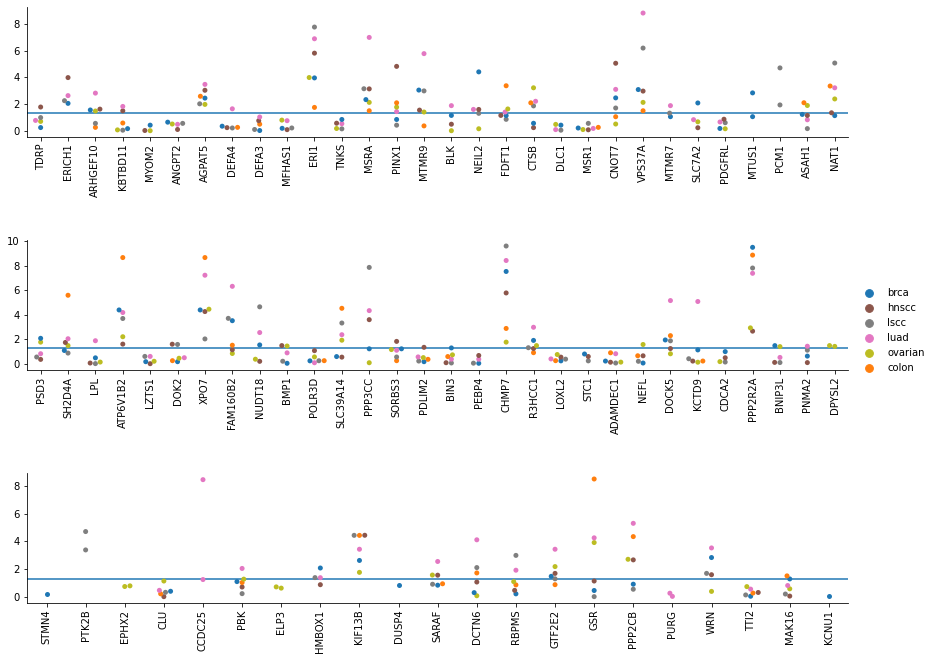

In [12]:
cnvutils.make_pvalue_plot(
    results,
    label_column='index', 
    value_column='value', 
    group_column='cancer_type')